In [1]:
import os
from google.colab import drive
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# Authenticate and mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls "/content/drive/MyDrive/GE-461/Project 3/data"

test1.txt  train1.txt


In [4]:
def read_text_file(file_path,dim):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    inputs = []
    outputs = []
    for line in lines:
        data_point = line.strip().split()
        inputs.append(float(data_point[0]))
        outputs.append(float(data_point[1]))
    inputs = np.array(inputs).reshape(dim,1)
    outputs = np.array(outputs).reshape(dim,1)
    return inputs, outputs

In [5]:
# Path to the directory
data_path = "/content/drive/MyDrive/GE-461/Project 3/data"

# Extracting data
X_test, y_test = read_text_file(data_path + "/test1.txt",41)
X_train, y_train = read_text_file(data_path + "/train1.txt",60)

In [6]:
def normalize_data(X):
    min_val = np.min(X)
    max_val = np.max(X)
    X_normalized = (X - min_val) / (max_val - min_val)
    return X_normalized

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def initialize_parameters(input_size, hidden_size, output_size):
    if hidden_size == 0:
        W1 = np.random.randn(input_size, output_size)
        b1 = np.zeros((1, output_size))
        W2, b2 = None, None
    else:
        W1 = np.random.randn(input_size, hidden_size)
        b1 = np.zeros((1, hidden_size))
        W2 = np.random.randn(hidden_size, output_size)
        b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

def forward_propagation(X, W1, b1, W2=None, b2=None):
    if W2 is None:
        z1 = np.dot(X, W1) + b1
        a1 = z1
        return a1, None
    else:
        z1 = np.dot(X, W1) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(a1, W2) + b2
        a2 = z2
        return a1, a2

def backward_propagation(X, y, a1, a2=None, W2=None):
    if a2 is None:
        error_output = y - a1
        delta_output = error_output
        return delta_output, None
    else:
        error_output = y - a2
        delta_output = error_output
        error_hidden = delta_output.dot(W2.T)
        delta_hidden = error_hidden * sigmoid_derivative(a1)
        return delta_output, delta_hidden

def update_parameters(W1, b1, W2=None, b2=None, X=None, a1=None, delta_output=None, delta_hidden=None, learning_rate=0.01):
    if W2 is None:
        W1 += X.T.dot(delta_output) * learning_rate
        b1 += np.sum(delta_output, axis=0, keepdims=True) * learning_rate
        return W1, b1
    else:
        W1 += X.T.dot(delta_hidden) * learning_rate
        b1 += np.sum(delta_hidden, axis=0, keepdims=True) * learning_rate
        W2 += a1.T.dot(delta_output) * learning_rate
        b2 += np.sum(delta_output, axis=0, keepdims=True) * learning_rate
        return W1, b1, W2, b2

def train_neural_network(X_train, y_train, input_size, hidden_size, output_size, epochs, learning_rate):
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)
    for epoch in range(epochs):
        for i in range(X_train.shape[0]):
            if hidden_size == 0:
                a1, _ = forward_propagation(X_train[i], W1, b1)
                delta_output, _ = backward_propagation(X_train[i], y_train[i], a1)
            else:
                a1, a2 = forward_propagation(X_train[i], W1, b1, W2, b2)
                delta_output, delta_hidden = backward_propagation(X_train[i], y_train[i], a1, a2, W2)
            if hidden_size == 0:
                W1, b1 = update_parameters(W1, b1, X=X_train[i], a1=a1, delta_output=delta_output, learning_rate=learning_rate)
            else:
                W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, X_train[i], a1, delta_output, delta_hidden, learning_rate)
        if epoch % 5 == 0:
            if hidden_size == 0:
                loss = np.mean(np.square(y_train - forward_propagation(X_train, W1, b1)[0]))
            else:
                loss = np.mean(np.square(y_train - forward_propagation(X_train, W1, b1, W2, b2)[1]))
            #print(f'Epoch {epoch}, Loss: {loss}')
    return W1, b1, W2, b2

def predict(X_test, W1, b1, W2=None, b2=None):
    if W2 is None:
        return forward_propagation(X_test, W1, b1)[0]
    else:
        return forward_propagation(X_test, W1, b1, W2, b2)[1]

def calculate_loss_mean(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def calculate_loss_stddev(y_true, y_pred):
    return np.std((y_true - y_pred) ** 2)

In [7]:
X_train_normalized = normalize_data(X_train)
X_test_normalized = normalize_data(X_test)

In [8]:
# Parameters
epochs = 10000
learning_rate = 0.001
hidden_size = 32

# Train the neural network
parameters = train_neural_network(X_train_normalized, y_train, X_train.shape[1], hidden_size, 1, epochs, learning_rate)

# Make predictions
predictions = predict(X_test_normalized, *parameters)

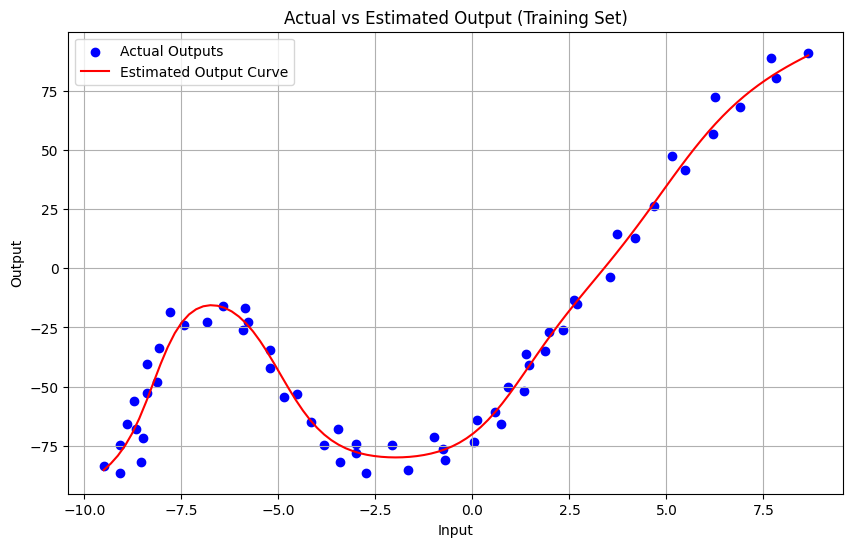

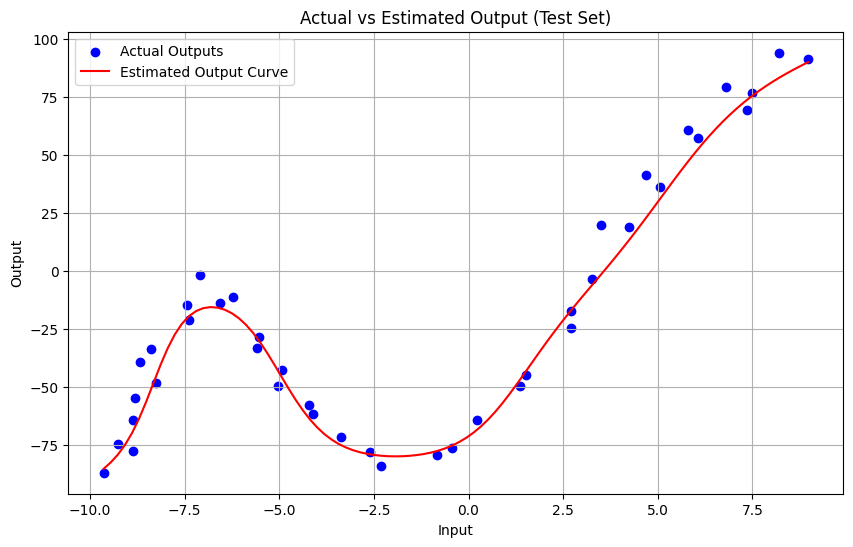

In [9]:
# Generate uniformly distributed data points within the range of the input points
x_train_uniform = np.linspace(np.min(X_train), np.max(X_train), 100).reshape(-1, 1)
x_test_uniform = np.linspace(np.min(X_test), np.max(X_test), 100).reshape(-1, 1)
x_train_uniform_normalized = normalize_data(np.linspace(np.min(X_train), np.max(X_train), 100).reshape(-1, 1))
x_test_uniform_normalized = normalize_data(np.linspace(np.min(X_test), np.max(X_test), 100).reshape(-1, 1))

# Predict outputs for uniformly distributed data points
uniform_train_predict = predict(x_train_uniform_normalized, *parameters)
uniform_test_predict = predict(x_test_uniform_normalized, *parameters)

# Plot actual outputs and estimated output curve for training set
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual Outputs')
plt.plot(x_train_uniform, uniform_train_predict, color='red', label='Estimated Output Curve')
plt.title('Actual vs Estimated Output (Training Set)')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()

# Plot actual outputs and estimated output curve for test set
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Outputs')
plt.plot(x_test_uniform, uniform_test_predict, color='red', label='Estimated Output Curve')
plt.title('Actual vs Estimated Output (Test Set)')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
error = calculate_loss_mean(y_test,predictions)
print(error)

76.07270558068815


Network Configuration | Training Loss (Mean ± Std) | Test Loss (Mean ± Std)
--------------------------------------------------------------------------------
Epochs: 500, LR: 0.01, Hidden Units: 0 | Training Loss: 1792.7588 ± 3030.7485 | Test Loss: 2559.6488 ± 3658.8125
Epochs: 500, LR: 0.01, Hidden Units: 2 | Training Loss: 1316.4384 ± 1851.1410 | Test Loss: 1641.8741 ± 2187.9536


<ipython-input-57-2c4b99306391>:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epochs: 500, LR: 0.01, Hidden Units: 4 | Training Loss: 1334.1657 ± 1944.5995 | Test Loss: 1711.6964 ± 2330.7580
Epochs: 500, LR: 0.01, Hidden Units: 8 | Training Loss: 817.2055 ± 1162.3776 | Test Loss: 1068.7310 ± 1407.2481
Epochs: 500, LR: 0.01, Hidden Units: 16 | Training Loss: 976.5021 ± 1634.8326 | Test Loss: 1384.9647 ± 1988.6248
Epochs: 500, LR: 0.01, Hidden Units: 32 | Training Loss: 834.3827 ± 1477.0552 | Test Loss: 1188.2941 ± 1825.1079


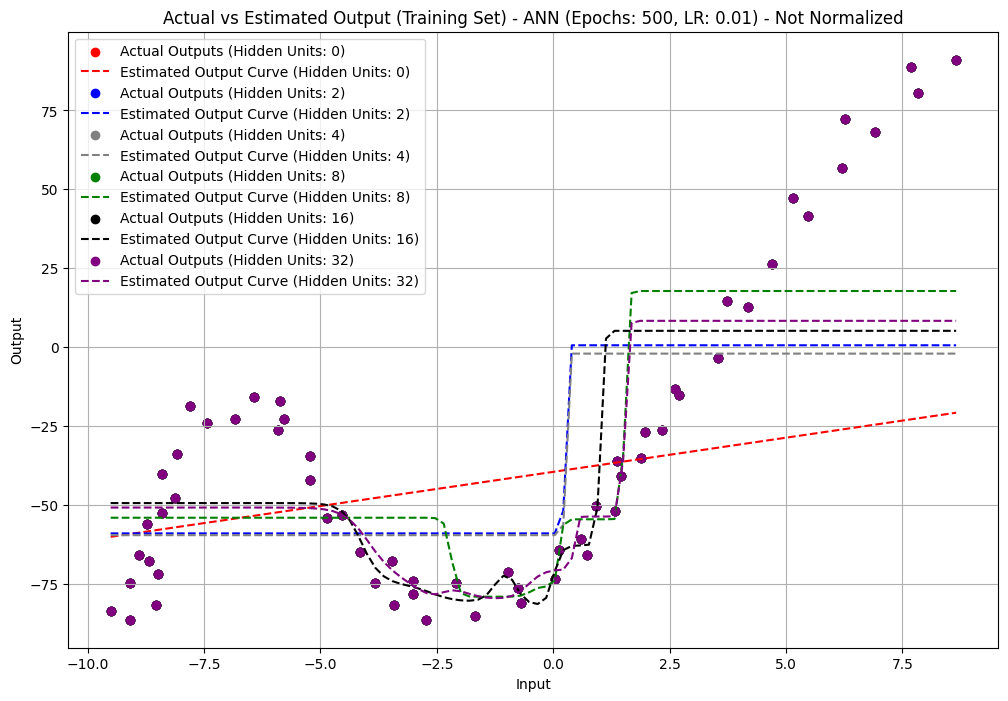

Network Configuration | Training Loss (Mean ± Std) | Test Loss (Mean ± Std)
--------------------------------------------------------------------------------
Epochs: 500, LR: 0.01, Hidden Units: 0 | Training Loss: 1194.0690 ± 1064.7963 | Test Loss: 1447.9521 ± 1295.5276
Epochs: 500, LR: 0.01, Hidden Units: 2 | Training Loss: 377.3140 ± 432.2039 | Test Loss: 507.8182 ± 686.8947
Epochs: 500, LR: 0.01, Hidden Units: 4 | Training Loss: 375.6623 ± 449.4985 | Test Loss: 560.3273 ± 692.8555
Epochs: 500, LR: 0.01, Hidden Units: 8 | Training Loss: 393.0184 ± 459.3773 | Test Loss: 592.8751 ± 703.6037
Epochs: 500, LR: 0.01, Hidden Units: 16 | Training Loss: 127.1337 ± 168.9595 | Test Loss: 213.4593 ± 241.9832
Epochs: 500, LR: 0.01, Hidden Units: 32 | Training Loss: 103.5388 ± 141.9111 | Test Loss: 170.5670 ± 210.7622


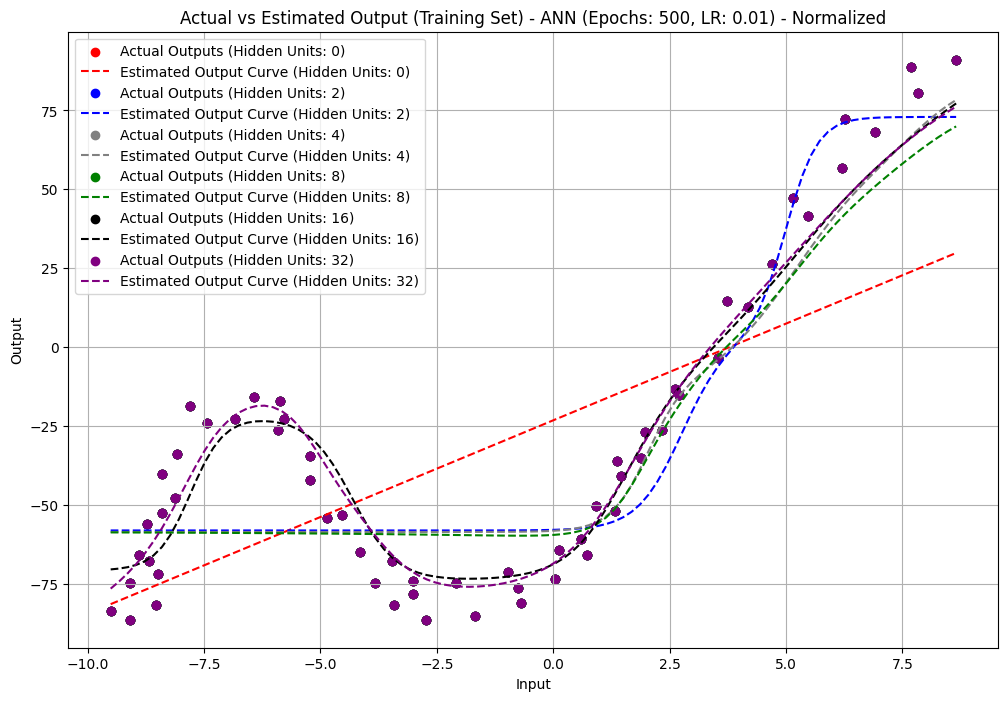

Network Configuration | Training Loss (Mean ± Std) | Test Loss (Mean ± Std)
--------------------------------------------------------------------------------
Epochs: 10000, LR: 0.001, Hidden Units: 0 | Training Loss: 1202.2152 ± 1117.5499 | Test Loss: 1404.9950 ± 1279.3413
Epochs: 10000, LR: 0.001, Hidden Units: 2 | Training Loss: 373.3069 ± 431.4617 | Test Loss: 507.5428 ± 677.5108
Epochs: 10000, LR: 0.001, Hidden Units: 4 | Training Loss: 336.2459 ± 449.8007 | Test Loss: 459.6897 ± 694.1132
Epochs: 10000, LR: 0.001, Hidden Units: 8 | Training Loss: 328.7151 ± 453.5970 | Test Loss: 445.8829 ± 697.7639
Epochs: 10000, LR: 0.001, Hidden Units: 16 | Training Loss: 329.5334 ± 453.2161 | Test Loss: 445.0731 ± 698.4948
Epochs: 10000, LR: 0.001, Hidden Units: 32 | Training Loss: 53.3836 ± 92.6016 | Test Loss: 119.3703 ± 211.7457


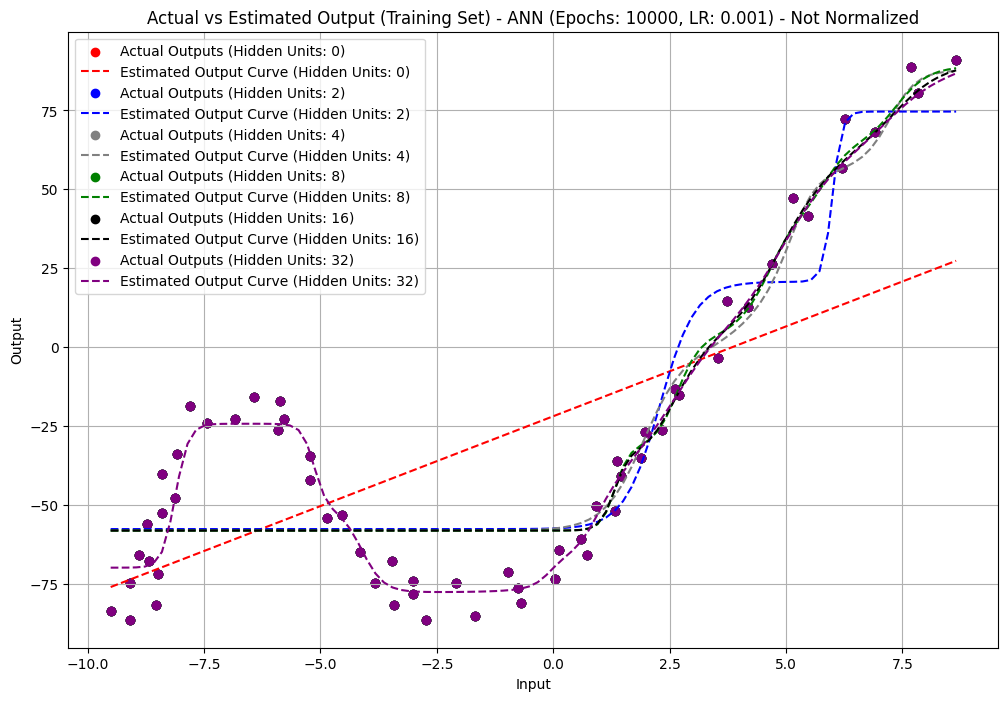

Network Configuration | Training Loss (Mean ± Std) | Test Loss (Mean ± Std)
--------------------------------------------------------------------------------
Epochs: 10000, LR: 0.001, Hidden Units: 0 | Training Loss: 1189.8345 ± 1023.1487 | Test Loss: 1394.1938 ± 1214.8347
Epochs: 10000, LR: 0.001, Hidden Units: 2 | Training Loss: 370.2558 ± 443.0569 | Test Loss: 456.2470 ± 700.5293
Epochs: 10000, LR: 0.001, Hidden Units: 4 | Training Loss: 331.7748 ± 453.3459 | Test Loss: 460.3972 ± 696.5983
Epochs: 10000, LR: 0.001, Hidden Units: 8 | Training Loss: 42.1445 ± 62.6597 | Test Loss: 88.2807 ± 148.1143
Epochs: 10000, LR: 0.001, Hidden Units: 16 | Training Loss: 42.5484 ± 65.8683 | Test Loss: 79.9321 ± 133.2003
Epochs: 10000, LR: 0.001, Hidden Units: 32 | Training Loss: 43.3321 ± 68.4447 | Test Loss: 76.0493 ± 127.8026


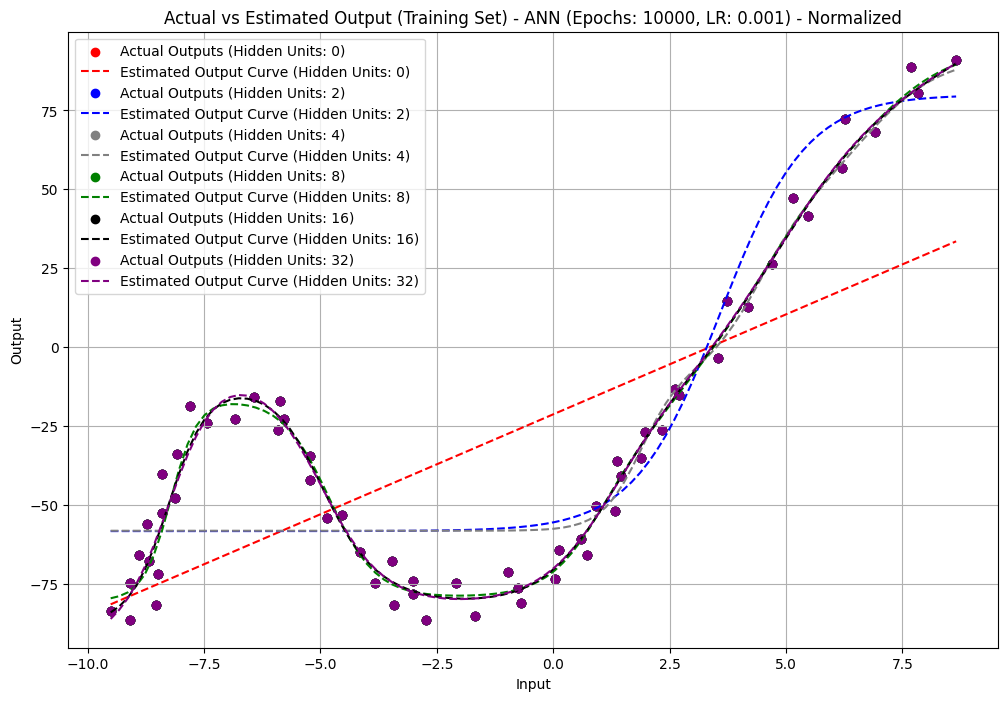

In [ ]:
# Define hyperparameter environment
hidden_sizes = [0, 2, 4, 8, 16, 32]
epochs = [500, 10000]
learning_rates = [0.01, 0.001]
normalizations = [X_train, X_train_normalized]

# Define colors for plotting
colors = ["red", "blue", "grey", "green", "black", "purple"]

# Iterate over parameter environment
for epoch, learning_rate in zip(epochs, learning_rates):
    for normalization in normalizations:
        plt.figure(figsize=(12, 8))
        plt.title(f'Actual vs Estimated Output (Training Set) - ANN (Epochs: {epoch}, LR: {learning_rate}) - {"Normalized" if normalization is X_train_normalized else "Not Normalized"}')
        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.grid(True)
        print("Network Configuration | Training Loss (Mean ± Std) | Test Loss (Mean ± Std)")
        print("-" * 80)
        for hidden_size, color in zip(hidden_sizes, colors):
            plt.scatter(X_train, y_train, color=color, label=f'Actual Outputs (Hidden Units: {hidden_size})')

            # Train the neural network
            parameters = train_neural_network(normalization, y_train, normalization.shape[1], hidden_size, 1, epoch, learning_rate)

            # Set the input data for prediction based on normalization
            x_train_uniform_input = x_train_uniform_normalized if normalization is X_train_normalized else x_train_uniform

            # Predict outputs for uniformly distributed data points
            uniform_train_predict = predict(x_train_uniform_input, *parameters)

            # Plot estimated output curve for training set
            plt.plot(x_train_uniform, uniform_train_predict, color=color, linestyle='--', label=f'Estimated Output Curve (Hidden Units: {hidden_size})')

            # Predict outputs for training set
            train_predictions = predict(normalization, *parameters)

            # Calculate training loss
            train_loss_mean = calculate_loss_mean(y_train, train_predictions)
            train_loss_stddev = calculate_loss_stddev(y_train, train_predictions)

            # Predict outputs for test set
            test_predictions = predict(X_test_normalized, *parameters) if normalization is X_train_normalized else predict(X_test, *parameters)

            # Calculate test loss
            test_loss_mean = calculate_loss_mean(y_test, test_predictions)
            test_loss_stddev = calculate_loss_stddev(y_test, test_predictions)
            # Print the results
            print(f"Epochs: {epoch}, LR: {learning_rate}, Hidden Units: {hidden_size} | Training Loss: {train_loss_mean:.4f} ± {train_loss_stddev:.4f} | Test Loss: {test_loss_mean:.4f} ± {test_loss_stddev:.4f}")

        plt.legend()
        plt.show()
